In [1]:
import tensorflow as tf

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# Import the Resent50 library as shown below and add preprocessing 
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:

# i don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('G:\\Cotton\\train/*')

In [8]:
# our layers 
x = Flatten()(resnet.output)

In [9]:
len(folders)

4

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('G:\\Cotton\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('G:\\Cotton\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 285s 5s/step - loss: 2.4865 - accuracy: 0.3844 - val_loss: 1.5189 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 278s 5s/step - loss: 1.0805 - accuracy: 0.5720 - val_loss: 1.7890 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 276s 5s/step - loss: 0.9108 - accuracy: 0.6258 - val_loss: 0.7103 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 277s 5s/step - loss: 0.8640 - accuracy: 0.6566 - val_loss: 1.0309 - val_accuracy: 0.5000
Epoch 5/20
61/61 [==============================] - 278s 5s/step - loss: 1.0535 - accuracy: 0.6084 - val_loss: 1.1932 - val_accuracy: 0.5556
Epoch 6/20
61/61 [==============================] - 285s 5s/step - loss: 1.1472 - accuracy: 0.6079 - val_loss: 1.4348 - val_accuracy: 0.6111
Epoch 7/20
61/61 [==============================] - 278s 5s/step - loss: 0.871

In [17]:
import matplotlib.pyplot as plt

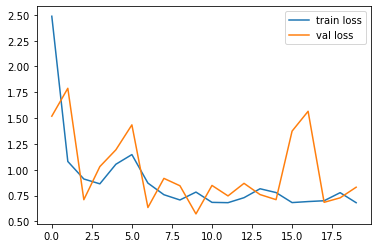

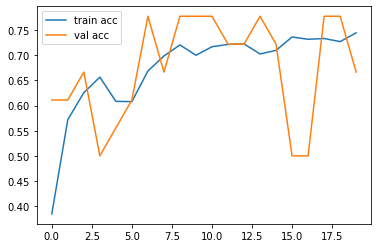

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)
y_pred

array([[1.9652087e-03, 3.3524274e-03, 8.9017230e-01, 1.0451014e-01],
       [1.1955975e-04, 3.6040552e-02, 2.9297156e-04, 9.6354693e-01],
       [2.5273445e-03, 9.5580899e-06, 9.9707079e-01, 3.9219123e-04],
       [1.1021027e-05, 8.8257048e-06, 9.7884661e-01, 2.1133490e-02],
       [6.8340619e-04, 9.2322034e-01, 3.0855497e-06, 7.6093145e-02],
       [1.6073404e-02, 1.3221802e-02, 4.6452108e-01, 5.0618368e-01],
       [8.7016437e-05, 1.2180045e-05, 6.4401102e-05, 9.9983633e-01],
       [1.5213968e-01, 2.5623304e-01, 5.8227032e-04, 5.9104508e-01],
       [4.8194701e-04, 8.0182654e-01, 8.6464721e-04, 1.9682689e-01],
       [5.2472838e-04, 3.4681717e-01, 7.8750961e-04, 6.5187055e-01],
       [9.4947833e-01, 1.5631193e-05, 2.4630434e-03, 4.8042960e-02],
       [3.4642770e-05, 8.1065325e-03, 4.5406487e-05, 9.9181342e-01],
       [3.4293783e-04, 2.2785317e-02, 4.0108740e-04, 9.7647059e-01],
       [2.4686007e-02, 7.5499318e-03, 9.1467291e-01, 5.3091127e-02],
       [1.9201197e-04, 1.8037391e-

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 2, 2, 1, 3, 3, 3, 1, 3, 0, 3, 3, 2, 3, 1, 3, 1], dtype=int64)